In [1]:
# Install pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=520873bbc8eb9af189c822ee92469b102fdc4b6e8a8dad12fc13485b9f3789dd
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [3]:
# Import a Spark function from library
from pyspark.sql.functions import col

In [4]:
path = "/content/drive/MyDrive/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the CSV file into a DataFrame
df = spark.read.csv(path, header=True, inferSchema=True)

# Show the DataFrame
df.show()

+--------------------+---------+-------+------------+--------------------+----------+--------------------+--------------------+--------------------+--------+---------------+---------------+---------------+----------+--------------+--------------------------+-------------------+--------------------+---------------------+-----------+-----------------------+-----------------+-----------------------+--------------------+-----------------------+---------------+--------------------+-------+-------+----------+----------+----------+-------------------------+-----------------+-------------------------+-----------------+-------------------------+-----------------+------+
|               RowId|YearStart|YearEnd|LocationAbbr|        LocationDesc|Datasource|               Class|               Topic|            Question|Response|Data_Value_Unit|DataValueTypeID|Data_Value_Type|Data_Value|Data_Value_Alt|Data_Value_Footnote_Symbol|Data_Value_Footnote|Low_Confidence_Limit|High_Confidence_Limit|Sample_Si

In [7]:
# Get the data types of all columns
data_types = df.dtypes

# Print the data types
for column, data_type in data_types:
    print(f"Column: {column}, Data Type: {data_type}")

Column: RowId, Data Type: string
Column: YearStart, Data Type: int
Column: YearEnd, Data Type: int
Column: LocationAbbr, Data Type: string
Column: LocationDesc, Data Type: string
Column: Datasource, Data Type: string
Column: Class, Data Type: string
Column: Topic, Data Type: string
Column: Question, Data Type: string
Column: Response, Data Type: string
Column: Data_Value_Unit, Data Type: string
Column: DataValueTypeID, Data Type: string
Column: Data_Value_Type, Data Type: string
Column: Data_Value, Data Type: string
Column: Data_Value_Alt, Data Type: string
Column: Data_Value_Footnote_Symbol, Data Type: string
Column: Data_Value_Footnote, Data Type: string
Column: Low_Confidence_Limit, Data Type: string
Column: High_Confidence_Limit, Data Type: string
Column: Sample_Size, Data Type: double
Column: StratificationCategory1, Data Type: string
Column: Stratification1, Data Type: string
Column: StratificationCategory2, Data Type: string
Column: Stratification2, Data Type: string
Column: Str

In [8]:
from pyspark.sql.functions import col

# Assuming 'Data_Value' is the column with numeric values that should be floats
df = df.withColumn("Data_Value", col("Data_Value").cast("float"))


In [9]:
# Count the number of rows in the DataFrame
row_count = df.count()

# Print the row count
print("Row Count:", row_count)

Row Count: 250937


In [10]:
# Remove duplicate rows and assign the result back to 'df'
df = df.dropDuplicates()

In [11]:
# List of columns to keep
columns_to_keep = ['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question', 'Data_Value', 'Data_Value_Type', 'Stratification1']

# Select the specified columns
df = df.select(columns_to_keep)


In [12]:
# Get the column names
column_names = df.columns

# Print the column names
print(column_names)

['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question', 'Data_Value', 'Data_Value_Type', 'Stratification1']


In [13]:
# Import necessary functions from pyspark.sql.functions
from pyspark.sql.functions import col, isnan, when, count
# Check for null values in each column
null_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])

# Show the null counts
null_counts.show()

+---------+-------+------------+-----+-----+--------+----------+---------------+---------------+
|YearStart|YearEnd|LocationDesc|Class|Topic|Question|Data_Value|Data_Value_Type|Stratification1|
+---------+-------+------------+-----+-----+--------+----------+---------------+---------------+
|        0|      0|           0|    0|    0|       0|     88778|              0|           9682|
+---------+-------+------------+-----+-----+--------+----------+---------------+---------------+



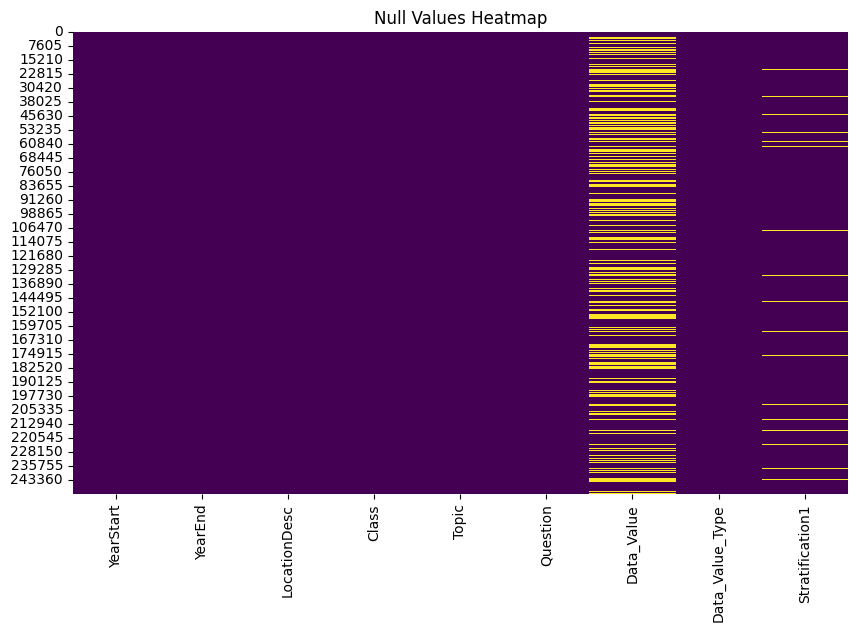

In [14]:
from pyspark.sql import SparkSession

def check_Null():
    # Create a Spark session
    spark = SparkSession.builder.appName("NullValuesVisualization").getOrCreate()

    # Convert the PySpark DataFrame to a Pandas DataFrame
    df_pandas = df.toPandas()

    import matplotlib.pyplot as plt
    import seaborn as sns

    # Create a heatmap of null values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_pandas.isnull(), cmap="viridis", cbar=False)
    plt.title("Null Values Heatmap")
    plt.show()

check_Null()

In [15]:
# Import necessary functions
from pyspark.sql.functions import mean

# Calculate the mean value of the 'Data_Value' column
mean_data_value = df.select(mean(col('Data_Value'))).collect()[0][0]

# Fill null values in the 'Data_Value' column with the mean value
df = df.withColumn('Data_Value', when(col('Data_Value').isNull(), mean_data_value).otherwise(col('Data_Value')))

In [16]:
# Drop rows with null values in the 'Stratification1' column
df = df.na.drop(subset=['Stratification1'])

In [17]:
# Create a list of column names
columns = df.columns

# Check for null values column-wise and create a list of boolean values
nan_check_per_column = [df.filter(col(c).isNull()).count() > 0 for c in columns]

# Print the results
print("NaN check per column:")
for column, nan_check in zip(columns, nan_check_per_column):
    print(f"{column}: {nan_check}")


NaN check per column:
YearStart: False
YearEnd: False
LocationDesc: False
Class: False
Topic: False
Question: False
Data_Value: False
Data_Value_Type: False
Stratification1: False


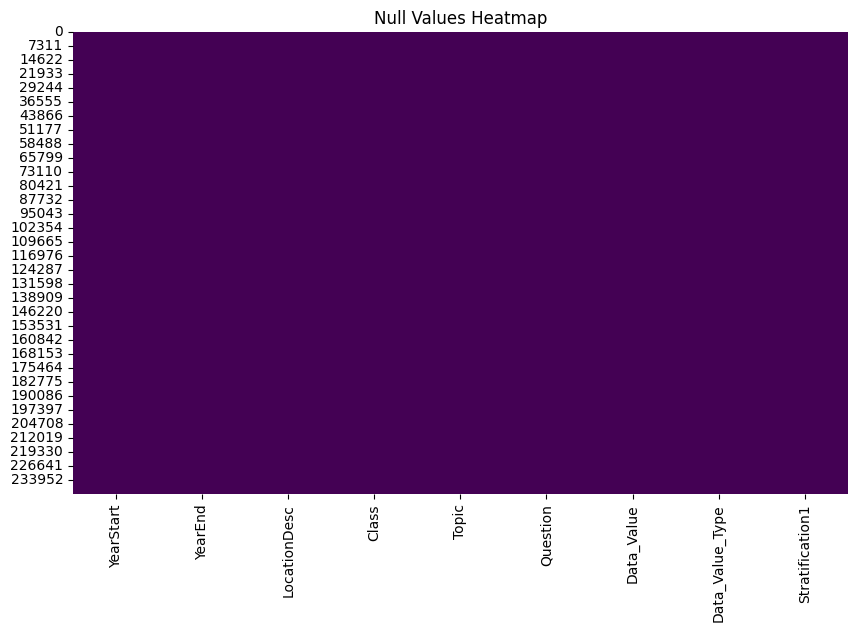

In [18]:
check_Null()

In [19]:
# Select the 'LocationDesc' column and get distinct values
unique_values = df.select(col('LocationDesc')).distinct()

# Convert the result to a list
unique_values_list = [row.LocationDesc for row in unique_values.collect()]

# Print the unique values
print(unique_values_list)


['Utah', 'Hawaii', 'Minnesota', 'Ohio', 'Oregon', 'Arkansas', 'Midwest', 'Texas', 'North Dakota', 'Pennsylvania', 'Connecticut', 'Vermont', 'Nebraska', 'Nevada', 'Puerto Rico', 'Washington', 'Illinois', 'Oklahoma', 'Virgin Islands', 'District of Columbia', 'Delaware', 'South', 'Alaska', 'New Mexico', 'West Virginia', 'Missouri', 'Rhode Island', 'Georgia', 'Montana', 'Michigan', 'Virginia', 'Guam', 'United States, DC & Territories', 'North Carolina', 'Wyoming', 'Kansas', 'New Jersey', 'Maryland', 'Alabama', 'Arizona', 'Iowa', 'Massachusetts', 'Kentucky', 'Louisiana', 'Mississippi', 'West', 'New Hampshire', 'Tennessee', 'Indiana', 'Florida', 'Idaho', 'South Carolina', 'South Dakota', 'California', 'New York', 'Wisconsin', 'Maine', 'Colorado', 'Northeast']


In [20]:
# Define conditions for each time zone
pacific_zone = ['California', 'Nevada', 'Washington', 'Oregon']
mountain_zone = ['Wyoming', 'Colorado', 'Montana', 'Arizona', 'New Mexico', 'Utah', 'Idaho']
central_zone = ['Illinois', 'Missouri', 'Kansas', 'Wisconsin', 'Iowa', 'Kentucky', 'Minnesota', 'North Dakota', 'South Dakota', 'Nebraska', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Tennessee']
eastern_zone = ['New Hampshire', 'Vermont', 'Connecticut', 'Delaware', 'Massachusetts', 'Rhode Island', 'New Jersey', 'New York', 'Pennsylvania', 'Virginia', 'West Virginia', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Michigan', 'Indiana', 'Ohio', 'Maine', 'Midwest']

# Create a new column 'Zones' based on the conditions
df = df.withColumn(
    'Zones',
    when(col('LocationDesc').isin(pacific_zone), 'Pacific')
    .when(col('LocationDesc').isin(mountain_zone), 'Mountain')
    .when(col('LocationDesc').isin(central_zone), 'Central')
    .when(col('LocationDesc').isin(eastern_zone), 'Eastern')
    .otherwise('Other')
)

# Display the DataFrame
df.show()

+---------+-------+-------------+--------------------+--------------------+--------------------+------------------+---------------+-----------------+--------+
|YearStart|YearEnd| LocationDesc|               Class|               Topic|            Question|        Data_Value|Data_Value_Type|  Stratification1|   Zones|
+---------+-------+-------------+--------------------+--------------------+--------------------+------------------+---------------+-----------------+--------+
|     2015|   2015|     Illinois|      Overall Health|Fair or poor heal...|Fair or poor heal...| 34.70000076293945|     Percentage|          Overall| Central|
|     2015|   2015|       Hawaii|   Cognitive Decline|Need assistance w...|Percentage of old...|36.599998474121094|     Percentage|      50-64 years|   Other|
|     2018|   2018|Massachusetts|Nutrition/Physica...|             Obesity|Percentage of old...|              27.0|     Percentage|          Overall| Eastern|
|     2016|   2016|      Indiana|      Overall

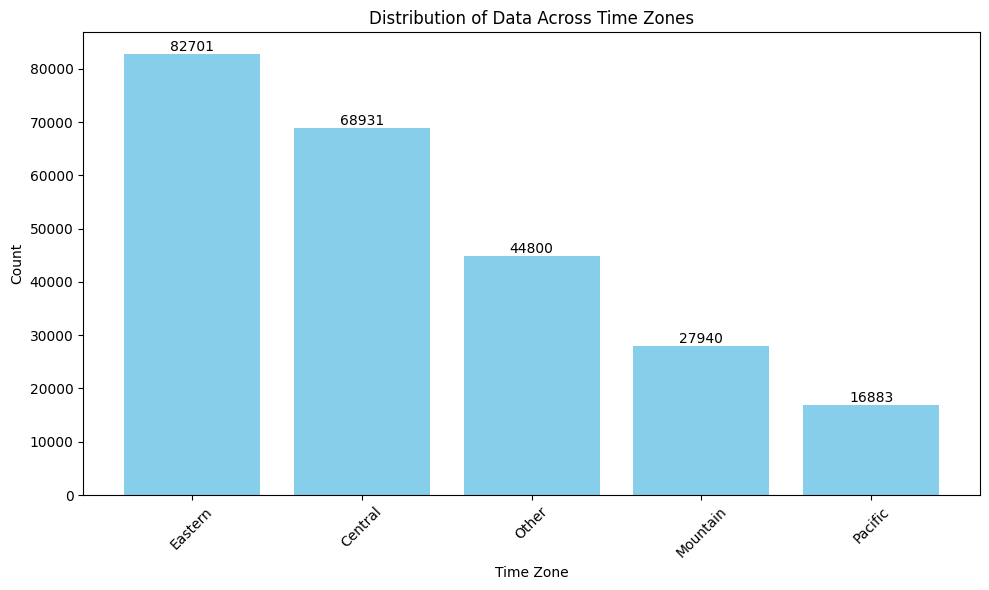

In [22]:
import matplotlib.pyplot as plt

# Group the DataFrame by the 'Zones' column and count the occurrences in each zone
zone_counts = df.groupBy('Zones').count().orderBy('count', ascending=False)

# Convert the result to a Pandas DataFrame for plotting
zone_counts_df = zone_counts.toPandas()

# Create a bar chart to visualize the distribution of data across time zones
plt.figure(figsize=(10, 6))
plt.bar(zone_counts_df['Zones'], zone_counts_df['count'], color='skyblue')
plt.xlabel('Time Zone')
plt.ylabel('Count')
plt.title('Distribution of Data Across Time Zones')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add data labels on top of the bars
for index, row in zone_counts_df.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
# Get the column names
column_names = df.columns

# Print the column names
print(column_names)

['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question', 'Data_Value', 'Data_Value_Type', 'Stratification1', 'Zones']


In [ ]:
# Select the 'Zones' column and get distinct values
unique_values = df.select(col('Zones')).distinct()

# Convert the result to a list of unique values
unique_values_list = [row.Zones for row in unique_values.collect()]

# Print the unique values
print(unique_values_list)

['Mountain', 'Eastern', 'Other', 'Central', 'Pacific']


+--------+----------+
|   Zones|TopicCount|
+--------+----------+
|Mountain|     27940|
| Eastern|     82701|
|   Other|     44800|
| Central|     68931|
| Pacific|     16883|
+--------+----------+



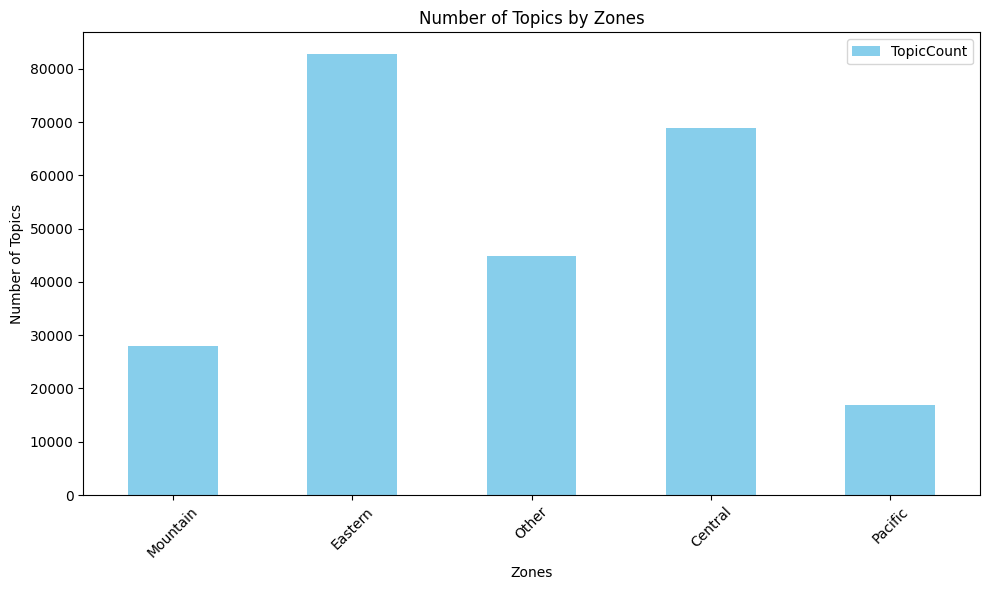

In [25]:
# Import necessary library
from pyspark.sql import functions as F

# Group by 'Zones' and count the total number of 'Topic' values
topic_counts = df.groupby('Zones').agg(F.count('Topic').alias('TopicCount'))

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
topic_counts_pd = topic_counts.toPandas()
# Debug print to check intermediate results
topic_counts.show()
# Plot the data
topic_counts_pd.plot(kind='bar', x='Zones', y='TopicCount', color='skyblue', figsize=(10, 6))
plt.title('Number of Topics by Zones')
plt.xlabel('Zones')
plt.ylabel('Number of Topics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Import necessary functions
from pyspark.sql.functions import collect_set

# Group by 'Class' and collect unique 'Topic' values as an array
class_to_topic_mapping = df.groupby("Class").agg(collect_set("Topic").alias("Topics"))

# Convert the PySpark DataFrame to a Python dictionary
class_to_topic_mapping_dict = dict(class_to_topic_mapping.rdd.map(lambda row: (row.Class, row.Topics)).collect())

# Print the mapping
for class_name, topics in class_to_topic_mapping_dict.items():
    print(f"Class: {class_name}")
    print(f"Topics: {', '.join(topics)}")
    print()


Class: Mental Health
Topics: Lifetime diagnosis of depression, Frequent mental distress

Class: Screenings and Vaccines
Topics: High blood pressure ever, Diabetes screening within past 3 years, Mammogram within past 2 years, Ever had pneumococcal vaccine, Pap test within past 3 years, Up-to-date with recommended vaccines and screenings - Women, Influenza vaccine within past year, Up-to-date with recommended vaccines and screenings - Men, Colorectal cancer screening, Cholesterol checked in past 5 years

Class: Overall Health
Topics: Self-rated health (fair to poor health), Fair or poor health among older adults with arthritis, Taking medication for high blood pressure, Arthritis among older adults, Severe joint pain among older adults with arthritis, Prevalence of sufficient sleep, Recent activity limitations in past month, Disability status, including sensory or mobility limitations, Physically unhealthy days (mean number of days), Fall with injury within last year, Oral health:  tooth

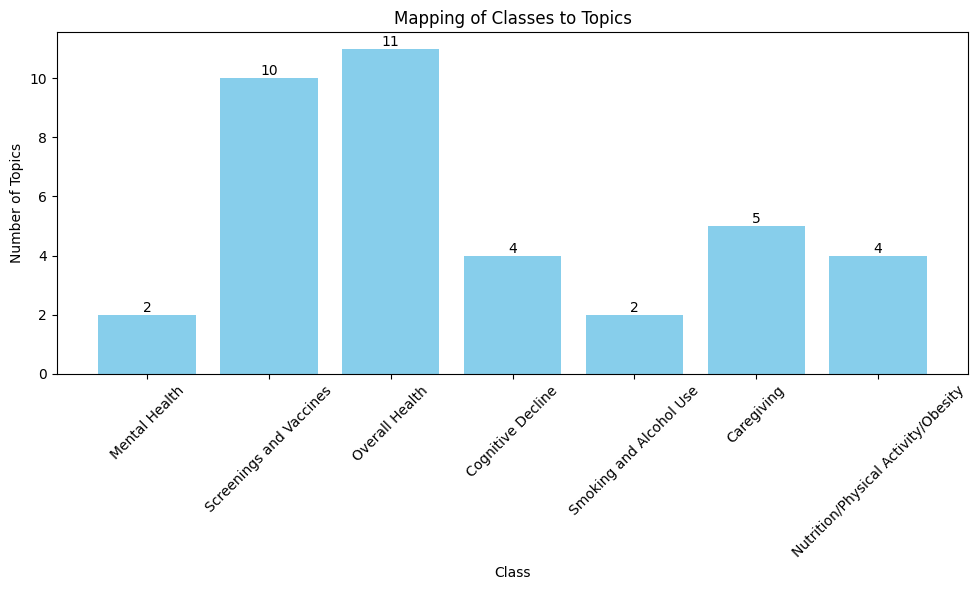

In [27]:
# Extract class names and their corresponding topic counts
class_names = list(class_to_topic_mapping_dict.keys())
topic_counts = [len(topics) for topics in class_to_topic_mapping_dict.values()]

# Create a bar chart to visualize the mapping
plt.figure(figsize=(10, 6))
plt.bar(class_names, topic_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Topics')
plt.title('Mapping of Classes to Topics')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add data labels on top of the bars
for i, count in enumerate(topic_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

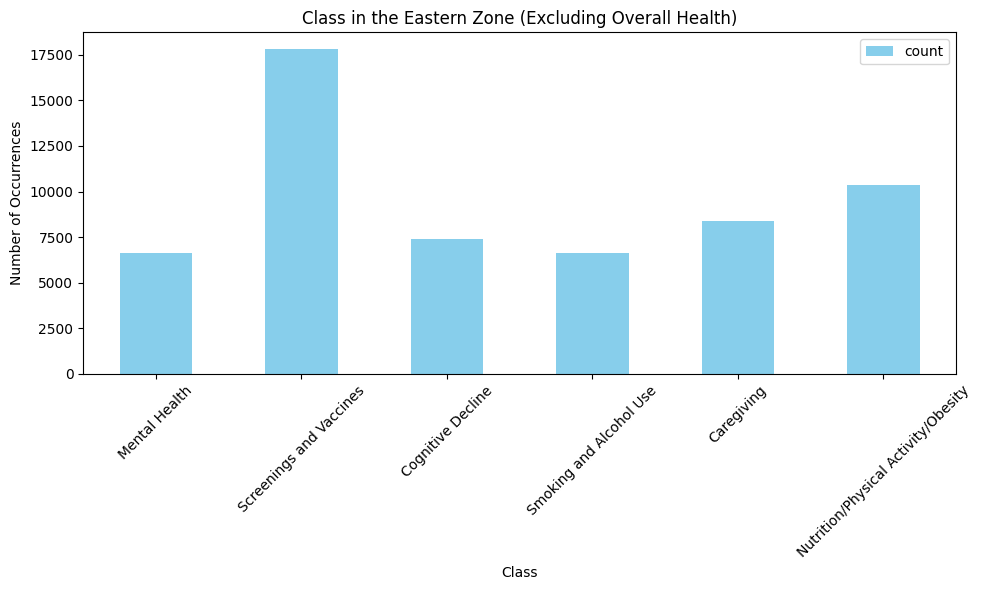

In [28]:
# Filter the DataFrame for the 'Eastern' zone
east_df = df.filter(col('Zones') == 'Eastern')

# Exclude 'Overall Health' from the data
east_df_filtered = east_df.filter(col('Class') != 'Overall Health')

# Count the occurrences of classes in the 'Central' zone, excluding 'Overall Health'
class_counts = east_df_filtered.groupby('Class').count()

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
class_counts_pd = class_counts.toPandas()

# Plot the data
class_counts_pd.plot(kind='bar', x='Class', y='count', color='skyblue', figsize=(10, 6))
plt.title('Class in the Eastern Zone (Excluding Overall Health)')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


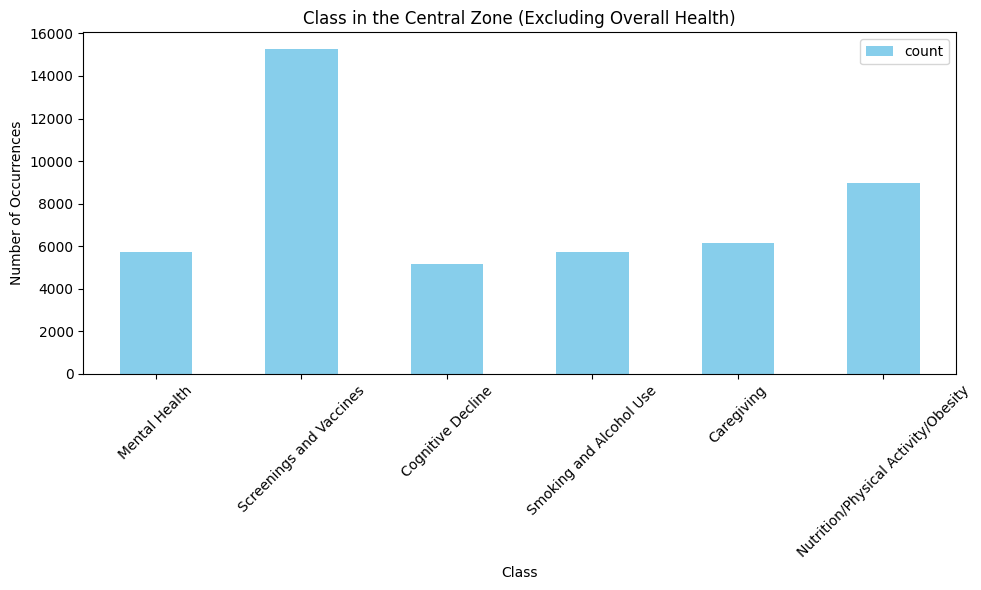

In [29]:
# Filter the DataFrame for the 'Central' zone
cent_df = df.filter(col('Zones') == 'Central')

# Exclude 'Overall Health' from the data
cent_df_filtered = cent_df.filter(col('Class') != 'Overall Health')

# Count the occurrences of classes in the 'Central' zone, excluding 'Overall Health'
class_counts = cent_df_filtered.groupby('Class').count()

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
class_counts_pd = class_counts.toPandas()

# Plot the data
class_counts_pd.plot(kind='bar', x='Class', y='count', color='skyblue', figsize=(10, 6))
plt.title('Class in the Central Zone (Excluding Overall Health)')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

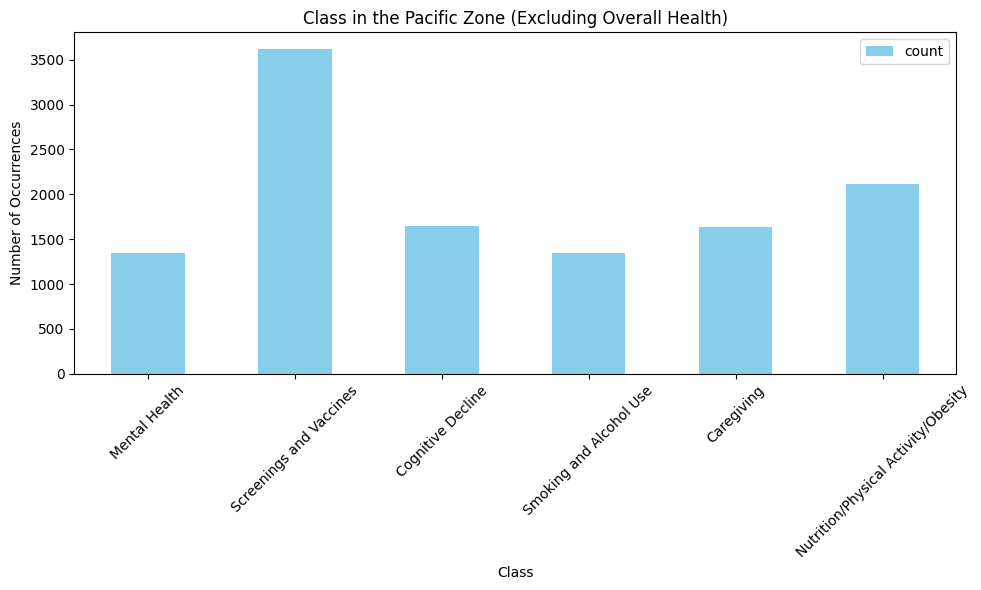

In [30]:
# Filter the DataFrame for the 'Pacific' zone
paci_df = df.filter(col('Zones') == 'Pacific')

# Exclude 'Overall Health' from the data
paci_df_filtered = paci_df.filter(col('Class') != 'Overall Health')

# Count the occurrences of classes in the 'Central' zone, excluding 'Overall Health'
class_counts = paci_df_filtered.groupby('Class').count()

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
class_counts_pd = class_counts.toPandas()

# Plot the data
class_counts_pd.plot(kind='bar', x='Class', y='count', color='skyblue', figsize=(10, 6))
plt.title('Class in the Pacific Zone (Excluding Overall Health)')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


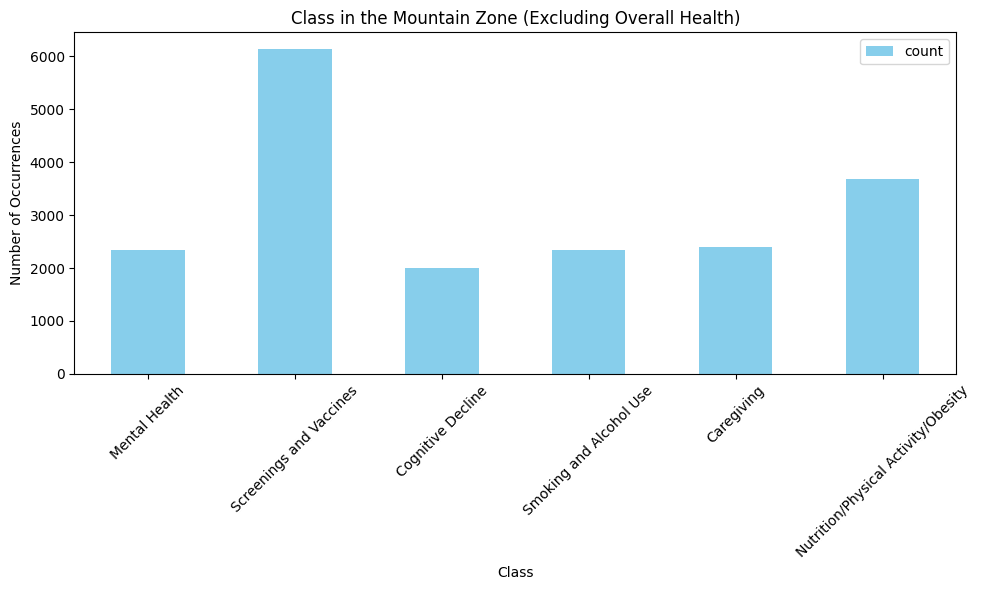

In [31]:
# Filter the DataFrame for the 'Mountain' zone
moun_df = df.filter(col('Zones') == 'Mountain')

# Exclude 'Overall Health' from the data
moun_df_filtered = moun_df.filter(col('Class') != 'Overall Health')

# Count the occurrences of classes in the 'Central' zone, excluding 'Overall Health'
class_counts = moun_df_filtered.groupby('Class').count()

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
class_counts_pd = class_counts.toPandas()

# Plot the data
class_counts_pd.plot(kind='bar', x='Class', y='count', color='skyblue', figsize=(10, 6))
plt.title('Class in the Mountain Zone (Excluding Overall Health)')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


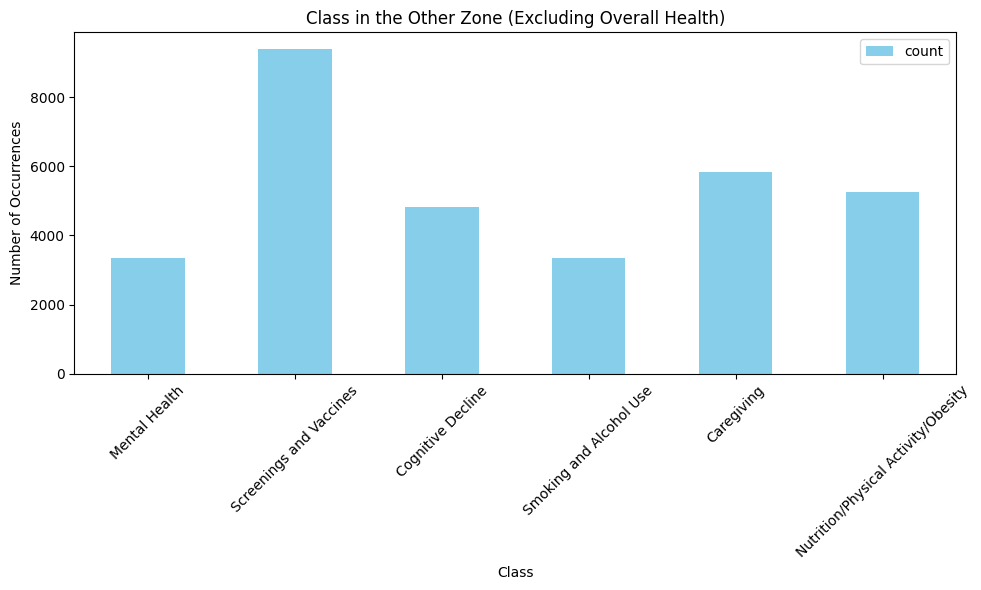

In [32]:
# Filter the DataFrame for the 'Other' zone
other_df = df.filter(col('Zones') == 'Other')

# Exclude 'Overall Health' from the data
other_df_filtered = other_df.filter(col('Class') != 'Overall Health')

# Count the occurrences of classes in the 'Central' zone, excluding 'Overall Health'
class_counts = other_df_filtered.groupby('Class').count()

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
class_counts_pd = class_counts.toPandas()

# Plot the data
class_counts_pd.plot(kind='bar', x='Class', y='count', color='skyblue', figsize=(10, 6))
plt.title('Class in the Other Zone (Excluding Overall Health)')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
# Select the 'Topic' column and get distinct values
unique_values = df.select(col('Topic')).distinct()

# Convert the result to a list of unique values
unique_values_list = [row.Topic for row in unique_values.collect()]

# Print the unique values
print(unique_values_list)

['Arthritis among older adults', 'Mammogram within past 2 years', 'Physically unhealthy days (mean number of days)', 'Colorectal cancer screening', 'Taking medication for high blood pressure', 'Current smoking', 'Cholesterol checked in past 5 years', 'Binge drinking within past 30 days', 'Obesity', 'Intensity of caregiving among older adults', 'Severe joint pain among older adults with arthritis', 'Provide care for a friend or family member in past month', 'Influenza vaccine within past year', 'Disability status, including sensory or mobility limitations', 'Subjective cognitive decline or memory loss among older adults', 'Talked with health care professional about subjective cognitive decline or memory loss', 'High blood pressure ever', 'Duration of caregiving among older adults', 'No leisure-time physical activity within past month', 'Eating 3 or more vegetables daily', 'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss', 'Prevalence of 

In [34]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Create a user-defined function (UDF) to map categorical values to numerical values
def map_topic_to_numerical(topic):
    if topic == 'Arthritis among older adults':
        return 0
    elif topic == 'Eating 3 or more vegetables daily':
        return 1
    elif topic == 'Frequent mental distress':
        return 2
    elif topic == 'Recent activity limitations in the past month':
        return 3
    elif topic == 'Influenza vaccine within the past year':
        return 4
    elif topic == 'Physically unhealthy days (mean number of days)':
        return 5
    elif topic == 'Prevalence of sufficient sleep':
        return 6
    elif topic == 'Lifetime diagnosis of depression':
        return 7
    elif topic == 'Eating 2 or more fruits daily':
        return 8
    elif topic == 'Obesity':
        return 9
    elif topic == 'Binge drinking within the past 30 days':
        return 10
    elif topic == 'Fall with injury within the last year':
        return 11
    elif topic == 'Intensity of caregiving among older adults':
        return 12
    elif topic == 'Fair or poor health among older adults with arthritis':
        return 13
    elif topic == 'Self-rated health (fair to poor health)':
        return 14
    elif topic == 'Cholesterol checked in the past 5 years':
        return 15
    elif topic == 'High blood pressure ever':
        return 16
    elif topic == 'Functional difficulties associated with subjective cognitive decline or memory loss among older adults':
        return 17
    elif topic == 'Current smoking':
        return 18
    elif topic == 'No leisure-time physical activity within the past month':
        return 19
    elif topic == 'Up-to-date with recommended vaccines and screenings - Women':
        return 20
    elif topic == 'Subjective cognitive decline or memory loss among older adults':
        return 21
    elif topic == 'Talked with health care professional about subjective cognitive decline or memory loss':
        return 22
    elif topic == 'Up-to-date with recommended vaccines and screenings - Men':
        return 23
    elif topic == 'Expect to provide care for someone in the next two years':
        return 24
    elif topic == 'Ever had pneumococcal vaccine':
        return 25
    elif topic == 'Self-rated health (good to excellent health)':
        return 26
    elif topic == 'Pap test within the past 3 years':
        return 27
    elif topic == 'Duration of caregiving among older adults':
        return 28
    elif topic == 'Mammogram within the past 2 years':
        return 29
    elif topic == 'Oral health: tooth retention':
        return 30
    elif topic == 'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss':
        return 31
    elif topic == 'Disability status, including sensory or mobility limitations':
        return 32
    elif topic == 'Provide care for a friend or family member in past month':
        return 33
    elif topic == 'Taking medication for high blood pressure':
        return 34
    elif topic == 'Diabetes screening within past 3 years':
        return 35
    elif topic == 'Colorectal cancer screening':
        return 36
    elif topic == 'Severe joint pain among older adults with arthritis':
        return 37
    elif topic == 'Provide care for someone with cognitive impairment within the past month':
        return 38
    else:
        return -1  # Return -1 for unknown values

# Create a UDF and apply it to the DataFrame
map_topic_udf = udf(map_topic_to_numerical, IntegerType())
df = df.withColumn('Topic', map_topic_udf('Topic'))

# Show the updated DataFrame
df.show()


+---------+-------+-------------+--------------------+-----+--------------------+------------------+---------------+-----------------+--------+
|YearStart|YearEnd| LocationDesc|               Class|Topic|            Question|        Data_Value|Data_Value_Type|  Stratification1|   Zones|
+---------+-------+-------------+--------------------+-----+--------------------+------------------+---------------+-----------------+--------+
|     2015|   2015|     Illinois|      Overall Health|   13|Fair or poor heal...| 34.70000076293945|     Percentage|          Overall| Central|
|     2015|   2015|       Hawaii|   Cognitive Decline|   31|Percentage of old...|36.599998474121094|     Percentage|      50-64 years|   Other|
|     2018|   2018|Massachusetts|Nutrition/Physica...|    9|Percentage of old...|              27.0|     Percentage|          Overall| Eastern|
|     2016|   2016|      Indiana|      Overall Health|   -1|Percentage of old...|14.300000190734863|     Percentage|      50-64 years| E

In [35]:
# Select the 'Question' column and get distinct values
unique_values = df.select(col('Question')).distinct()

# Convert the result to a list of unique values
unique_values_list = [row.Question for row in unique_values.collect()]

# Print the unique values
print(unique_values_list)

['Percentage of older adult women who have received a mammogram within the past 2 years', 'Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years', 'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it', 'Percentage of older adults getting sufficient sleep (>6 hours)', 'Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine', 'Fair or poor health among older adults with doctor-diagnosed arthritis', 'Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores', 'Percentage of older adults who reported influenza vaccine within the past year', 'Percentage of older adults who reported subjective cognitive decline or memory loss that 

In [36]:
# Create a user-defined function (UDF) to map categorical values to numerical values for the 'Question' column
def map_question_to_numerical(question):
    if question == 'Percentage of older adults ever told they have arthritis':
        return 0
    elif question == 'Percentage of older adults who are eating 3 or more vegetables daily':
        return 1
    elif question == 'Percentage of older adults who are experiencing frequent mental distress':
        return 2
    elif question == 'Mean number of days with activity limitations in the past month':
        return 3
    elif question == 'Percentage of older adults who reported influenza vaccine within the past year':
        return 4
    elif question == 'Physically unhealthy days (mean number of days in the past month)':
        return 5
    elif question == 'Percentage of older adults getting sufficient sleep (>6 hours)':
        return 6
    elif question == 'Percentage of older adults with a lifetime diagnosis of depression':
        return 7
    elif question == 'Percentage of older adults who are eating 2 or more fruits daily':
        return 8
    elif question == 'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more':
        return 9
    elif question == 'Percentage of older adults who reported binge drinking within the past 30 days':
        return 10
    elif question == 'Percentage of older adults who have fallen and sustained an injury within the last year':
        return 11
    elif question == 'Average of 20 or more hours of care per week provided to a friend or family member':
        return 12
    elif question == 'Fair or poor health among older adults with doctor-diagnosed arthritis':
        return 13
    elif question == 'Percentage of older adults who self-reported that their health is "fair" or "poor"':
        return 14
    elif question == 'Percentage of older adults who had a cholesterol screening within the past 5 years':
        return 15
    elif question == 'Percentage of older adults who have ever been told by a health professional that they have high blood pressure':
        return 16
    elif question == 'Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores':
        return 17
    elif question == 'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days':
        return 18
    elif question == 'Percentage of older adults who have not had any leisure time physical activity in the past month':
        return 19
    elif question == 'Percentage of older adult women who are up to date with select clinical preventive services':
        return 20
    elif question == 'Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months':
        return 21
    elif question == 'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it':
        return 22
    elif question == 'Percentage of older adult men who are up to date with select clinical preventive services':
        return 23
    elif question == 'Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years':
        return 24
    elif question == 'Percentage of at-risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine':
        return 25
    elif question == 'Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"':
        return 26
    elif question == 'Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years':
        return 27
    elif question == 'Percentage of older adults who provided care to a friend or family member for six months or more':
        return 28
    elif question == 'Percentage of older adult women who have received a mammogram within the past 2 years':
        return 29
    elif question == 'Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease':
        return 30
    elif question == 'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities':
        return 31
    elif question == 'Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)':
        return 32
    elif question == 'Percentage of older adults who provided care for a friend or family member within the past month':
        return 33
    elif question == 'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure':
        return 34
    elif question == 'Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years':
        return 35
    elif question == 'Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years':
        return 36
    elif question == 'Severe joint pain due to arthritis among older adults with doctor-diagnosed arthritis':
        return 37
    elif question == 'Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month':
        return 38
    else:
        return -1  # Return -1 for unknown values

# Create a UDF and apply it to the DataFrame for the 'Question' column
map_question_udf = udf(map_question_to_numerical, IntegerType())
df = df.withColumn('Question', map_question_udf('Question'))

# Show the updated DataFrame
df.show()


+---------+-------+-------------+--------------------+-----+--------+------------------+---------------+-----------------+--------+
|YearStart|YearEnd| LocationDesc|               Class|Topic|Question|        Data_Value|Data_Value_Type|  Stratification1|   Zones|
+---------+-------+-------------+--------------------+-----+--------+------------------+---------------+-----------------+--------+
|     2015|   2015|     Illinois|      Overall Health|   13|      13| 34.70000076293945|     Percentage|          Overall| Central|
|     2015|   2015|       Hawaii|   Cognitive Decline|   31|      31|36.599998474121094|     Percentage|      50-64 years|   Other|
|     2018|   2018|Massachusetts|Nutrition/Physica...|    9|       9|              27.0|     Percentage|          Overall| Eastern|
|     2016|   2016|      Indiana|      Overall Health|   -1|      -1|14.300000190734863|     Percentage|      50-64 years| Eastern|
|     2021|   2021|         Iowa|      Overall Health|   -1|       3|35.6907

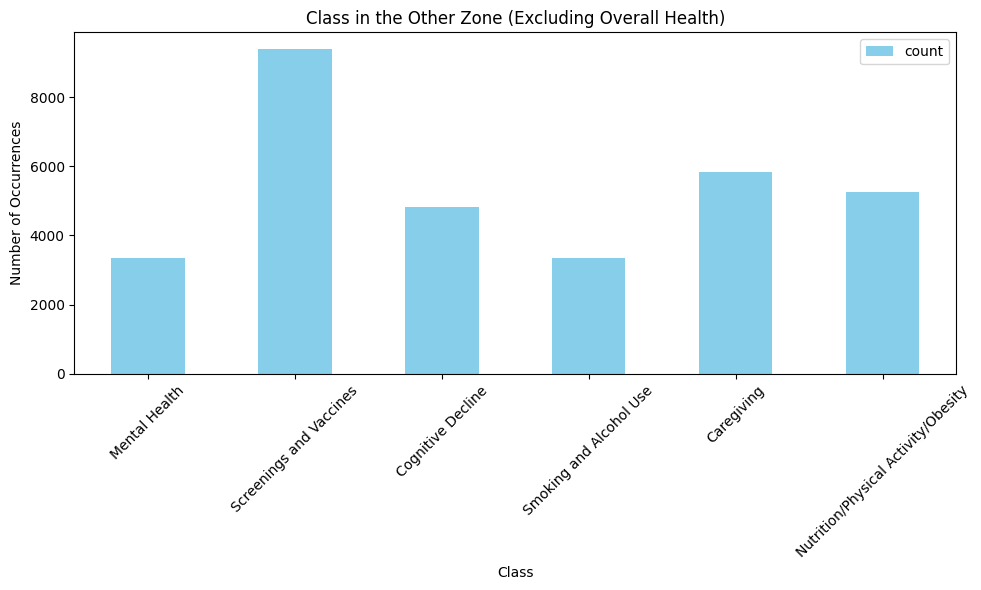

In [37]:
# Filter the DataFrame for the 'Other' zone
other_df = df.filter(col('Zones') == 'Other')

# Exclude 'Overall Health' from the data
other_df_filtered = other_df.filter(col('Class') != 'Overall Health')

# Count the occurrences of classes in the 'Central' zone, excluding 'Overall Health'
class_counts = other_df_filtered.groupby('Class').count()

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
class_counts_pd = class_counts.toPandas()

# Plot the data
class_counts_pd.plot(kind='bar', x='Class', y='count', color='skyblue', figsize=(10, 6))
plt.title('Class in the Other Zone (Excluding Overall Health)')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Print the shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 241255
Number of Columns: 10


We want to filter rows where the 'Class' column is equal to 'Screenings and Vaccines'.

In [39]:
# Filter rows where 'Class' is 'Screenings and Vaccines'
screening_df = df[df['Class'] == 'Screenings and Vaccines']
# Display the contents of the 'screening_df' DataFrame
screening_df.show()

+---------+-------+--------------+--------------------+-----+--------+------------------+---------------+-----------------+--------+
|YearStart|YearEnd|  LocationDesc|               Class|Topic|Question|        Data_Value|Data_Value_Type|  Stratification1|   Zones|
+---------+-------+--------------+--------------------+-----+--------+------------------+---------------+-----------------+--------+
|     2015|   2015|      Kentucky|Screenings and Va...|   -1|       4|35.690741185137966|     Percentage|65 years or older| Central|
|     2020|   2020|         Maine|Screenings and Va...|   35|      35|              63.5|     Percentage|65 years or older| Eastern|
|     2020|   2020| Massachusetts|Screenings and Va...|   20|      20|35.690741185137966|     Percentage|65 years or older| Eastern|
|     2020|   2020|     Wisconsin|Screenings and Va...|   36|      36|              67.5|     Percentage|          Overall| Central|
|     2020|   2020|      Arkansas|Screenings and Va...|   -1|      27

In [40]:
# Select the 'Stratification1' column and get distinct values
unique_values = df.select(col('Stratification1')).distinct()

# Convert the result to a list of unique values
unique_values_list = [row.Stratification1 for row in unique_values.collect()]

# Print the unique values
for value in unique_values_list:
    print(value)

65 years or older
Overall
50-64 years


In [41]:
# Drop rows where 'Stratification1' is 'Overall'
screening_df = screening_df.filter(col('Stratification1') != 'Overall')

# Display the modified DataFrame
screening_df.show()

+---------+-------+--------------+--------------------+-----+--------+------------------+---------------+-----------------+--------+
|YearStart|YearEnd|  LocationDesc|               Class|Topic|Question|        Data_Value|Data_Value_Type|  Stratification1|   Zones|
+---------+-------+--------------+--------------------+-----+--------+------------------+---------------+-----------------+--------+
|     2015|   2015|      Kentucky|Screenings and Va...|   -1|       4|35.690741185137966|     Percentage|65 years or older| Central|
|     2020|   2020|         Maine|Screenings and Va...|   35|      35|              63.5|     Percentage|65 years or older| Eastern|
|     2020|   2020| Massachusetts|Screenings and Va...|   20|      20|35.690741185137966|     Percentage|65 years or older| Eastern|
|     2020|   2020|      Arkansas|Screenings and Va...|   -1|      27|  75.9000015258789|     Percentage|      50-64 years| Central|
|     2021|   2021|     Tennessee|Screenings and Va...|   16|      16

In [42]:
# Replace values in the 'Stratification1' column
screening_df = screening_df.withColumn(
    'Stratification1',
    when(screening_df['Stratification1'] == '50-64 years', 0)
    .when(screening_df['Stratification1'] == '65 years or older', 1)
    .otherwise(screening_df['Stratification1'])
)

# Show the modified DataFrame
screening_df.show()

+---------+-------+--------------+--------------------+-----+--------+------------------+---------------+---------------+--------+
|YearStart|YearEnd|  LocationDesc|               Class|Topic|Question|        Data_Value|Data_Value_Type|Stratification1|   Zones|
+---------+-------+--------------+--------------------+-----+--------+------------------+---------------+---------------+--------+
|     2015|   2015|      Kentucky|Screenings and Va...|   -1|       4|35.690741185137966|     Percentage|              1| Central|
|     2020|   2020|         Maine|Screenings and Va...|   35|      35|              63.5|     Percentage|              1| Eastern|
|     2020|   2020| Massachusetts|Screenings and Va...|   20|      20|35.690741185137966|     Percentage|              1| Eastern|
|     2020|   2020|      Arkansas|Screenings and Va...|   -1|      27|  75.9000015258789|     Percentage|              0| Central|
|     2021|   2021|     Tennessee|Screenings and Va...|   16|      16|             

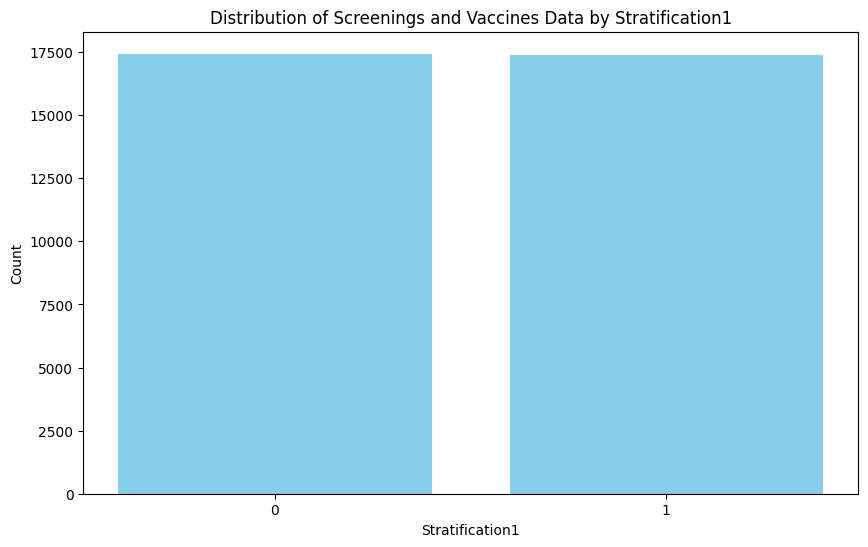

In [48]:
# Filter the DataFrame for 'Class' equal to 'Screenings and Vaccines'
screening_data = screening_df.filter(col('Class') == 'Screenings and Vaccines')

# Group by 'Stratification1' and count the occurrences
grouped_data = screening_data.groupBy('Stratification1').agg(count('*').alias('Count'))

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
grouped_data_pd = grouped_data.toPandas()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_pd['Stratification1'], grouped_data_pd['Count'], color='skyblue')
plt.title('Distribution of Screenings and Vaccines Data by Stratification1')
plt.xlabel('Stratification1')
plt.ylabel('Count')
plt.xticks()
plt.show()

In [49]:
# Get the unique values in the 'Data_Value_Type' column
data_value_types = df.select(col('Data_Value_Type')).distinct()

# Convert the result to a list of unique values
data_value_types_list = [row.Data_Value_Type for row in data_value_types.collect()]

# Print the unique values
for value in data_value_types_list:
    print(value)

Mean
Percentage


In [50]:
from pyspark.sql.functions import when, col

# Assuming 'Data_Value' represents percentages (between 0 and 1), you can convert 'mean' to percentage
screening_df = screening_df.withColumn(
    'Data_Value',
    when(screening_df['Data_Value_Type'] == 'Mean', screening_df['Data_Value'] * 100)
    .otherwise(screening_df['Data_Value'])
)


In [51]:
# Get the unique values in the 'Data_Value_Type' column
data_value_types = screening_df.select(col('Data_Value_Type')).distinct()

# Convert the result to a list of unique values
data_value_types_list = [row.Data_Value_Type for row in data_value_types.collect()]

# Print the unique values
for value in data_value_types_list:
    print(value)

Percentage


In [53]:
# Import necessary libraries
from pyspark.sql.functions import col, sum

# Calculate the count of missing values for each column
missing_values = screening_df.select([sum(col(column).isNull().cast("int")).alias(column + "_missing") for column in screening_df.columns])

# Show the missing value counts
missing_values.show()


+-----------------+---------------+--------------------+-------------+-------------+----------------+------------------+-----------------------+-----------------------+-------------+
|YearStart_missing|YearEnd_missing|LocationDesc_missing|Class_missing|Topic_missing|Question_missing|Data_Value_missing|Data_Value_Type_missing|Stratification1_missing|Zones_missing|
+-----------------+---------------+--------------------+-------------+-------------+----------------+------------------+-----------------------+-----------------------+-------------+
|                0|              0|                   0|            0|            0|               0|                 0|                      0|                      0|            0|
+-----------------+---------------+--------------------+-------------+-------------+----------------+------------------+-----------------------+-----------------------+-------------+



In [54]:
data_value_datatype = df.select('Data_Value').dtypes[0][1]
print("Data_Value datatype:", data_value_datatype)


Data_Value datatype: double


In [55]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Define your features (X) and target variable (y)
feature_cols = ['YearStart', 'YearEnd', 'Data_Value_Type', 'Question', 'Topic', 'Data_Value']
target_col = 'Stratification1'

# Select the columns of interest
selected_cols = feature_cols + [target_col]
df = screening_df.select(*selected_cols)

# Define categorical and numerical columns
categorical_cols = ['Data_Value_Type', ]
numerical_cols = ['YearStart', 'YearEnd', 'Data_Value','Question', 'Topic']

# Create a StringIndexer for the target variable
target_indexer = StringIndexer(inputCol=target_col, outputCol="label")

# Create StringIndexers for categorical columns
categorical_indexers = [
    StringIndexer(inputCol=c, outputCol=f"{c}_index").fit(df)
    for c in categorical_cols
]

# Assemble feature columns into a vector
assembler = VectorAssembler(
    inputCols=numerical_cols + [f"{c}_index" for c in categorical_cols],
    outputCol="features",
)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(
    labelCol="label", featuresCol="features", seed=42
)

# Split the data into training and testing sets
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Create a pipeline with transformers and classifier
from pyspark.ml import Pipeline
pipeline = Pipeline(
    stages=[target_indexer] + categorical_indexers + [assembler, rf_classifier]
)

# Fit the pipeline on the training data
model = pipeline.fit(train_df)

# Make predictions on the test data
predictions = model.transform(test_df)

# Evaluate the model's performance
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Accuracy:", accuracy)




Accuracy: 0.7034432234432234


In [56]:
# Create a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Calculate precision
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})

# Calculate recall
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

# Calculate F1 score
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.7183505069859082
Recall: 0.7034432234432234
F1 Score: 0.6990801150574696


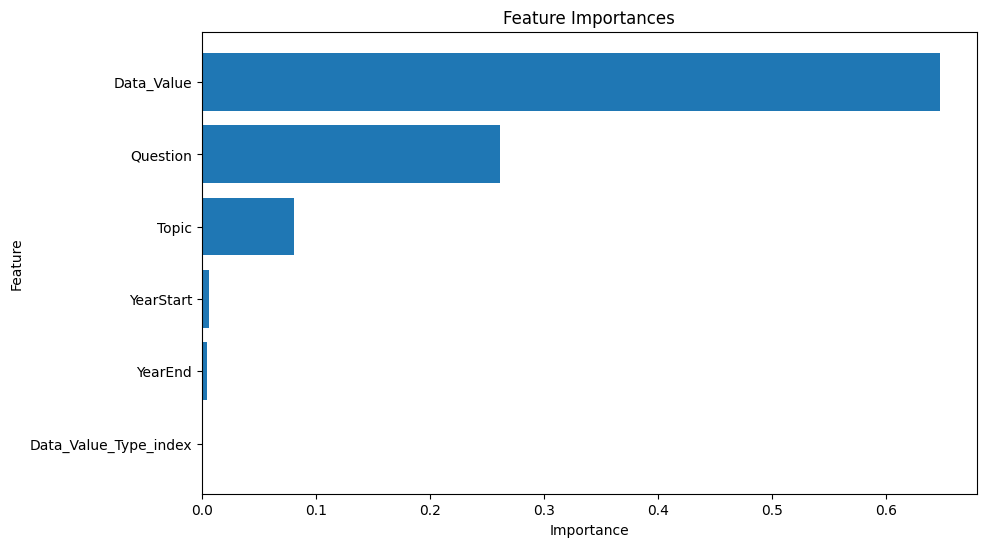

In [58]:
import pandas as pd

# Get feature importances from the trained model
feature_importances = model.stages[-1].featureImportances.toArray()

# Extract feature names from the VectorAssembler
feature_names = [f for f in numerical_cols + [f"{c}_index" for c in categorical_cols]]

# Create a Pandas DataFrame for easier manipulation
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


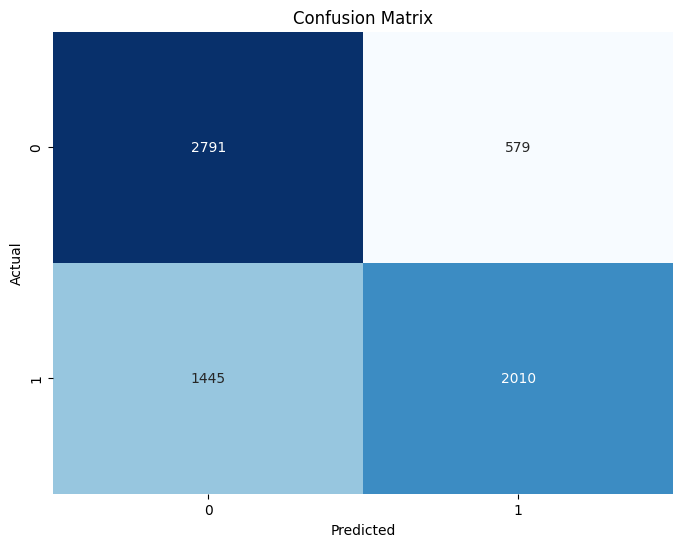

In [60]:
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics

# Convert the DataFrame to an RDD of (prediction, label) tuples
prediction_and_label = predictions.select("prediction", "label").rdd.map(lambda row: (float(row["prediction"]), float(row["label"])))

# Create a MulticlassMetrics object
metrics = MulticlassMetrics(prediction_and_label)

# Get the confusion matrix as a NumPy array
confusion_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Customize x and y axis labels
tick_labels = [str(i) for i in range(len(df.select(target_col).distinct().rdd.flatMap(lambda x: x).collect()))]
plt.xticks(ticks=[i + 0.5 for i in range(len(tick_labels))], labels=tick_labels)
plt.yticks(ticks=[i + 0.5 for i in range(len(tick_labels))], labels=tick_labels)

plt.show()


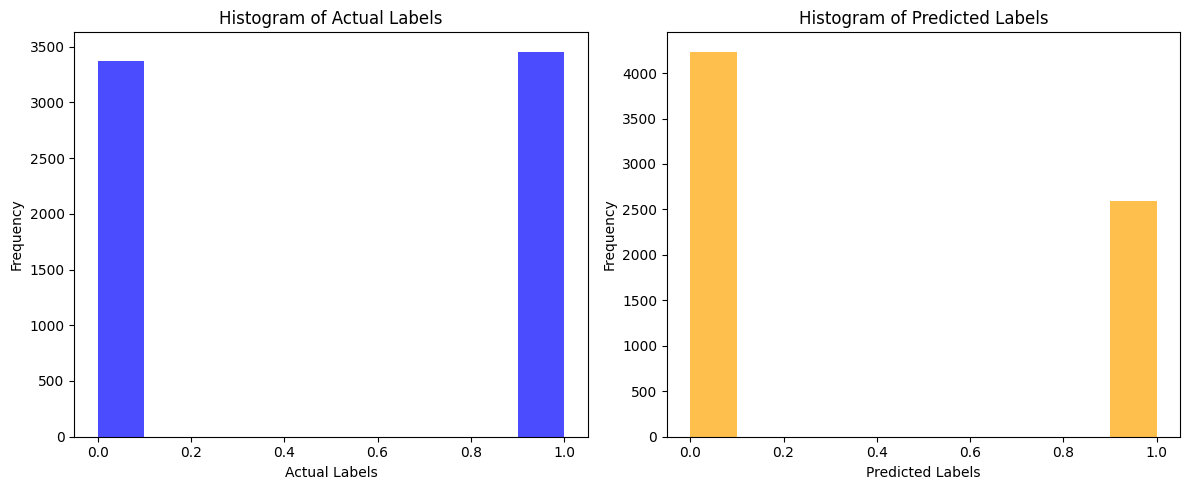

In [61]:
# Convert the PySpark predictions DataFrame to a Pandas DataFrame
predictions_pd = predictions.select("label", "prediction").toPandas()

# Extract the actual and predicted labels
actual_labels = predictions_pd["label"]
predicted_labels = predictions_pd["prediction"]

# Create a histogram for all actual labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(actual_labels, bins=10, color='blue', alpha=0.7)
plt.xlabel("Actual Labels")
plt.ylabel("Frequency")
plt.title("Histogram of Actual Labels")

# Create a histogram for all predicted labels
plt.subplot(1, 2, 2)
plt.hist(predicted_labels, bins=10, color='orange', alpha=0.7)
plt.xlabel("Predicted Labels")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Labels")

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


<ipython-input-63-9518f7891d1a>:26: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


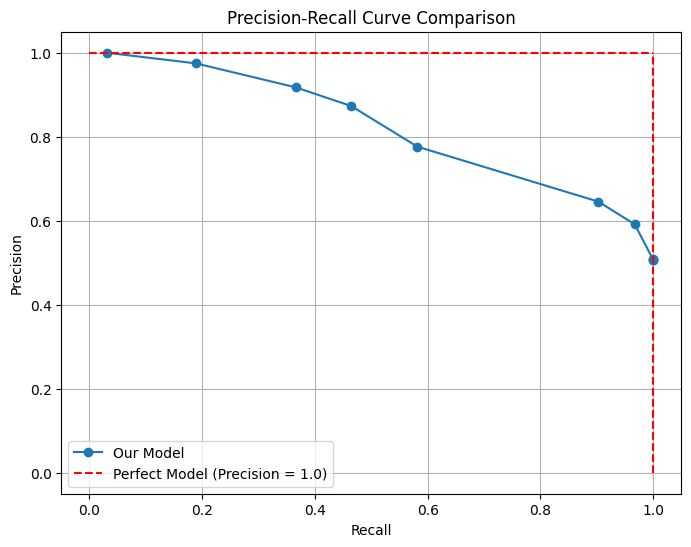

In [63]:
import numpy as np

# Convert the PySpark predictions DataFrame to a Pandas DataFrame
predictions_pd = predictions.select("probability", "label").toPandas()

# Extract probability vectors and true labels
probs = predictions_pd["probability"].apply(lambda x: x[1])
labels = predictions_pd["label"]

# Initialize an evaluator for precision and recall
evaluator = MulticlassClassificationEvaluator(metricName="f1")

# Get the thresholds
thresholds = np.arange(0.0, 1.1, 0.1)

# Initialize lists to store precision and recall values for your model
precision_list = []
recall_list = []

# Calculate precision and recall for your model
for threshold in thresholds:
    thresholded_probs = (probs >= threshold).astype(int)
    tp = np.sum(thresholded_probs * labels)
    fp = np.sum(thresholded_probs) - tp
    fn = np.sum(labels) - tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    precision_list.append(precision)
    recall_list.append(recall)

# Create a horizontal dashed line for the perfect model (precision = 1.0)
perfect_line_x = np.arange(0.0, 1.1, 0.1)
perfect_line_y = [1.0] * len(perfect_line_x)

# Create a vertical dashed line for the perfect model (recall = 1.0)
perfect_line_vertical_x = [1.0] * len(perfect_line_x)
perfect_line_vertical_y = np.arange(0.0, 1.1, 0.1)

# Plot the Precision-Recall Curve for your model and the perfect model
plt.figure(figsize=(8, 6))
plt.plot(recall_list, precision_list, marker='o', linestyle='-', label='Our Model')
plt.plot(perfect_line_x, perfect_line_y, color='red', linestyle='--', label='Perfect Model (Precision = 1.0)')
plt.plot(perfect_line_vertical_x, perfect_line_vertical_y, color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.grid(True)
plt.legend()
plt.show()
